 ## 9. Groups in Geometry

 Some observations & definitions about groups; this section shows how such ideas may arise from geometric motions on segments, angle, and rays:

 - a group G "acts" on a set of elements X
 - an orbit is a set of all congruent results of G on elements x in X
 - a subgroup *fixing* x (Fx) leaves elements x fixed (isotropy group)
 - a coset maps 1 element in a group to all elements in another group
 - conjugate subgroups are isotropy subgroups in the same orbit

 > These observations, and many like them, indicate the very close relation between Euclidean geometry and group theory - so close that one might say that groups were implicit (though never explicit) in traditional geometry. For these reasons, it is clear that the basic ideas of a group theory belong early in the conceptual order of mathematical structures.

In [10]:
from geometry.euclideanGroups import (
    GroupEuclidean,
    GroupSpecialEuclidean
)
from geometry.plane import plane_plot
from geometry.reflection import GroupReflection
from geometry.rotation import GroupRotation
from geometry.translation import GroupTranslation
from random import choice
from sympy import (
    Point,
    Segment,
    Triangle
)

In [2]:
t = GroupTranslation.get_example()
t

Translation(0.2622045258511585, 0.17609358350673365)

In [3]:
r = GroupRotation.get_example()
r

Rotation(Point2D(0.199288652074797, -0.538346739894261), 0.139445266399223*pi)

In [4]:
l = GroupReflection.get_example()
l

Reflection(Line2D(Point2D(0.520032500673191, 0.962518405292667), Point2D(0.0349167359555895, -0.54342608843832)))

In [6]:
A1 = Point(4, 7)
B1 = Point(6, 2)
C1 = Point(4, 3)
ABC1 = Triangle(A1, B1, C1)
s1 = Segment(Point(0, 3), Point(6, 6))

X = [A1, B1, C1, ABC1, s1]
X

[Point2D(4, 7),
 Point2D(6, 2),
 Point2D(4, 3),
 Triangle(Point2D(4, 7), Point2D(6, 2), Point2D(4, 3)),
 Segment2D(Point2D(0, 3), Point2D(6, 6))]

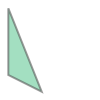

In [11]:
x = choice(X)
x

In [12]:
g1 = GroupEuclidean.get_example()
g1

Rotation(Point2D(0.922135218040218, -0.640710527040316), 1.2846374144414*pi)

In [13]:
g2 = GroupEuclidean.get_example()
g2

Rotation(Point2D(0.120584926186203, -0.18552110715565), 1.13716275256622*pi)

In [14]:
p1 = [x]
p2 = g2.act(p1)
p3 = g1.act(p2)

plane_plot(p1, p2, p3)

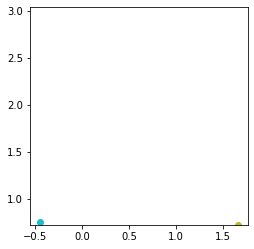

In [ ]:
p4 = (g1 + g2).act([x])
plane_plot(p1, p4)

In [ ]:
p3 == p4

False